In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Apple = data.DataReader("AAPL", data_source="yahoo", start = "1980-12-01", end = "2019-06-01")
Apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.515625,0.513393,0.513393,0.513393,117258400.0,0.022919
1980-12-15,0.488839,0.486607,0.488839,0.486607,43971200.0,0.021723
1980-12-16,0.453125,0.450893,0.453125,0.450893,26432000.0,0.020129
1980-12-17,0.464286,0.462054,0.462054,0.462054,21610400.0,0.020627
1980-12-18,0.477679,0.475446,0.475446,0.475446,18362400.0,0.021225


In [3]:
Apple.shape

(9694, 6)

In [4]:
Apple_train = Apple.iloc[:9500, :]
Apple_train.shape

(9500, 6)

In [5]:
Apple_test = Apple.iloc[9500:, :]
Apple_test.shape

(194, 6)

In [6]:
training_set = Apple.iloc[:9500, 2:3].values
training_set

array([[  0.51339287],
       [  0.4888393 ],
       [  0.453125  ],
       ...,
       [207.69999695],
       [210.16000366],
       [209.22000122]])

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 9499):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
9439/9439 [==============================] - 95s 10ms/step - loss: 0.0022
Epoch 2/100
9439/9439 [==============================] - 92s 10ms/step - loss: 8.7949e-04
Epoch 3/100
9439/9439 [==============================] - 88s 9ms/step - loss: 7.8291e-04
Epoch 4/100
9439/9439 [==============================] - 85s 9ms/step - loss: 7.1253e-04
Epoch 5/100
9439/9439 [==============================] - 83s 9ms/step - loss: 5.9029e-04
Epoch 6/100
9439/9439 [==============================] - 83s 9ms/step - loss: 6.0388e-04
Epoch 7/100
9439/9439 [==============================] - 83s 9ms/step - loss: 5.6849e-04
Epoch 8/100
9439/9439 [==============================] - 108s 11ms/step - loss: 5.1027e-04
Epoch 9/100
9439/9439 [==============================

Epoch 82/100
9439/9439 [==============================] - 87s 9ms/step - loss: 3.2505e-04
Epoch 83/100
9439/9439 [==============================] - 85s 9ms/step - loss: 3.1081e-04
Epoch 84/100
9439/9439 [==============================] - 85s 9ms/step - loss: 3.9863e-04
Epoch 85/100
9439/9439 [==============================] - 83s 9ms/step - loss: 3.4648e-04
Epoch 86/100
9439/9439 [==============================] - 83s 9ms/step - loss: 3.3164e-04
Epoch 87/100
9439/9439 [==============================] - 83s 9ms/step - loss: 3.5362e-04
Epoch 88/100
9439/9439 [==============================] - 83s 9ms/step - loss: 3.3656e-04
Epoch 89/100
9439/9439 [==============================] - 84s 9ms/step - loss: 3.4628e-04
Epoch 90/100
9439/9439 [==============================] - 82s 9ms/step - loss: 3.3166e-04
Epoch 91/100
9439/9439 [==============================] - 81s 9ms/step - loss: 3.7828e-04
Epoch 92/100
9439/9439 [==============================] - 82s 9ms/step - loss: 3.6052e-04
Epoch 93/1

In [9]:
# Part 3 - Making the predictions and visualising the results

# Getting the real recent stock price until May 2019
real_stock_price = Apple_test.iloc[:, 2:3].values

In [13]:
# Getting the predicted stock price until May 2019
Apple_total = pd.concat((Apple_train['Close'], Apple_test['Close']), axis = 0)
inputs = Apple_total[len(Apple_total) - len(Apple_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 254):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

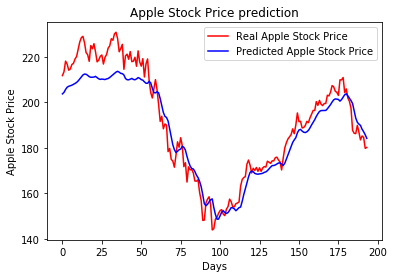

In [14]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price prediction')
plt.xlabel('Days')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [15]:
#Evaluating the RNN
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

7.383700405724006

In [16]:
min_val=min(real_stock_price)
max_val=max(real_stock_price)
print ("relative error: ", rmse/(max_val-min_val))

relative error:  [0.08506567]


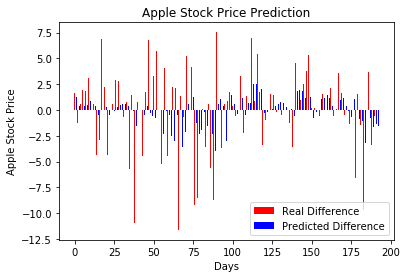

In [17]:
# Visualising the results
 
shift_pred= predicted_stock_price[:-1]
shift_pred = np.append(0, np.reshape(shift_pred, len(shift_pred)))
shift_real = real_stock_price[:-1]
shift_real = np.append(0, np.reshape(shift_real, len(shift_real)))
 
dif_pred = np.add(np.reshape(predicted_stock_price, len(predicted_stock_price)), - shift_pred)[1:]
dif_real = np.add(np.reshape(real_stock_price, len(real_stock_price)), - shift_real)[1:]
 
fig, ax = plt.subplots()
ind = np.arange(dif_real.size)
real_bar = ax.bar(ind-0.15, dif_real, width=0.3, color = 'red', label = 'Real Difference')
pred_bar = ax.bar(ind+0.15, dif_pred, width=0.3, color = 'blue', label = 'Predicted Difference')
ax.set_title('Apple Stock Price Prediction')
ax.set_xlabel('Days')
ax.set_ylabel('Apple Stock Price')
ax.legend()
plt.show()